
# Matplotlib logo

This example generates the current matplotlib logo.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm
import matplotlib.font_manager
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.text import TextPath
import matplotlib.transforms as mtrans

MPL_BLUE = '#11557c'


def get_font_properties():
    # The original font is Calibri, if that is not installed, we fall back
    # to Carlito, which is metrically equivalent.
    if 'Calibri' in matplotlib.font_manager.findfont('Calibri:bold'):
        return matplotlib.font_manager.FontProperties(family='Calibri',
                                                      weight='bold')
    if 'Carlito' in matplotlib.font_manager.findfont('Carlito:bold'):
        print('Original font not found. Falling back to Carlito. '
              'The logo text will not be in the correct font.')
        return matplotlib.font_manager.FontProperties(family='Carlito',
                                                      weight='bold')
    print('Original font not found. '
          'The logo text will not be in the correct font.')
    return None


def create_icon_axes(fig, ax_position, lw_bars, lw_grid, lw_border, rgrid):
    """
    Create a polar Axes containing the matplotlib radar plot.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        The figure to draw into.
    ax_position : (float, float, float, float)
        The position of the created Axes in figure coordinates as
        (x, y, width, height).
    lw_bars : float
        The linewidth of the bars.
    lw_grid : float
        The linewidth of the grid.
    lw_border : float
        The linewidth of the Axes border.
    rgrid : array-like
        Positions of the radial grid.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The created Axes.
    """
    with plt.rc_context({'axes.edgecolor': MPL_BLUE,
                         'axes.linewidth': lw_border}):
        ax = fig.add_axes(ax_position, projection='polar')
        ax.set_axisbelow(True)

        N = 7
        arc = 2. * np.pi
        theta = np.arange(0.0, arc, arc / N)
        radii = np.array([2, 6, 8, 7, 4, 5, 8])
        width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
        bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge',
                      edgecolor='0.3', lw=lw_bars)
        for r, bar in zip(radii, bars):
            color = *cm.jet(r / 10.)[:3], 0.6  # color from jet with alpha=0.6
            bar.set_facecolor(color)

        ax.tick_params(labelbottom=False, labeltop=False,
                       labelleft=False, labelright=False)

        ax.grid(lw=lw_grid, color='0.9')
        ax.set_rmax(9)
        ax.set_yticks(rgrid)

        # the actual visible background - extends a bit beyond the axis
        ax.add_patch(Rectangle((0, 0), arc, 9.58,
                               facecolor='white', zorder=0,
                               clip_on=False, in_layout=False))
        return ax


def create_text_axes(fig, height_px):
    """Create an Axes in *fig* that contains 'matplotlib' as Text."""
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_aspect("equal")
    ax.set_axis_off()

    path = TextPath((0, 0), "matplotlib", size=height_px * 0.8,
                    prop=get_font_properties())

    angle = 4.25  # degrees
    trans = mtrans.Affine2D().skew_deg(angle, 0)

    patch = PathPatch(path, transform=trans + ax.transData, color=MPL_BLUE,
                      lw=0)
    ax.add_patch(patch)
    ax.autoscale()


def make_logo(height_px, lw_bars, lw_grid, lw_border, rgrid, with_text=False):
    """
    Create a full figure with the Matplotlib logo.

    Parameters
    ----------
    height_px : int
        Height of the figure in pixel.
    lw_bars : float
        The linewidth of the bar border.
    lw_grid : float
        The linewidth of the grid.
    lw_border : float
        The linewidth of icon border.
    rgrid : sequence of float
        The radial grid positions.
    with_text : bool
        Whether to draw only the icon or to include 'matplotlib' as text.
    """
    dpi = 100
    height = height_px / dpi
    figsize = (5 * height, height) if with_text else (height, height)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.patch.set_alpha(0)

    if with_text:
        create_text_axes(fig, height_px)
    ax_pos = (0.535, 0.12, .17, 0.75) if with_text else (0.03, 0.03, .94, .94)
    ax = create_icon_axes(fig, ax_pos, lw_bars, lw_grid, lw_border, rgrid)

    return fig, ax

A large logo:



(<Figure size 110x110 with 1 Axes>, <PolarAxes:>)

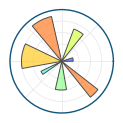

In [2]:
make_logo(height_px=110, lw_bars=0.7, lw_grid=0.5, lw_border=1,
          rgrid=[1, 3, 5, 7])

A small 32px logo:



(<Figure size 32x32 with 1 Axes>, <PolarAxes:>)

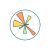

In [3]:
make_logo(height_px=32, lw_bars=0.3, lw_grid=0.3, lw_border=0.3, rgrid=[5])

A large logo including text, as used on the matplotlib website.



Original font not found. Falling back to Carlito. The logo text will not be in the correct font.


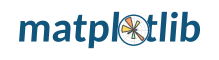

In [7]:
logo = make_logo(height_px=40, lw_bars=0.7, lw_grid=0.5, lw_border=1,
          rgrid=[1, 3, 5, 7], with_text=True)
plt.show()

In [11]:
logo[0].savefig('matplotlib_logo.png', dpi=100, bbox_inches='tight')

In [9]:
logo[0].savefig('matplotlib_logo.svg', dpi=600, bbox_inches='tight')

AttributeError: 'tuple' object has no attribute 'savefig'